<a href="https://colab.research.google.com/github/chandralakagwad/Playstore-App-Review-Analysis/blob/main/Final_Play_Store_App_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Play Store App Analysis**

#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#The data that we will be analysing has following csv files


*   Play store App data
*   User reviews



#**1. Importing the required libraries to analyse the data**

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#**2.Mount the drive and read the csv files and store them**

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV files

play_store_path = '/content/drive/My Drive/Almabetter dataset/Play Store Data.csv'

user_review_path = '/content/drive/My Drive/Almabetter dataset/User Reviews.csv'

play_store_df = pd.read_csv(play_store_path)
user_df = pd.read_csv(user_review_path)

#**3.Retrieving the data : In this section we understand the various columns and datatype of each column**

**To know the shape of each csv file**

In [4]:
play_store_df.shape

(10841, 13)

In [5]:
user_df.shape

(64295, 5)

**To know the overall information about the dataframe**

In [6]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**To Know the number of columns present in dataframe**

In [8]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
user_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**To get the first 10 rows of each data frame**

In [10]:
play_store_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [11]:
user_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


**To know the last 10 rows of the dataframe**

In [12]:
play_store_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [13]:
user_df.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**To get descriptive summary of all the numerical columns present in dataframe**

In [14]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [15]:
user_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#**4.Data Cleansing : Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.** 
#**So before we start analysing the data, it must be cleansed and incorrect/missing data should be handled properly to obtain better results.**

**Step1: To remove the duplicates present in the dataframe**

In [16]:
# To eliminate duplicate rows
play_store_df.drop_duplicates(subset='App',keep='last',inplace=True)

**Step2: Removing outlier.** **An Outlier is the value that is out of the accepted range of values. Removing outlier for a valid reason will aid in better performance of data. An outlier does not always mean that data is incorrect.**

In [17]:
# Maximum Rated app is an outlier
play_store_df.loc[play_store_df["Rating"].idxmax(),:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

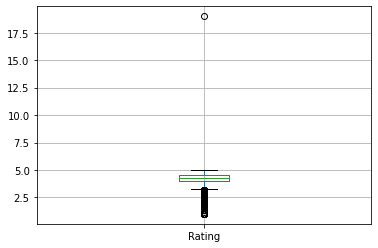

In [18]:
play_store_df.boxplot()

**As we can see from above boxplot that rating has value beyond 5 which is an outlier and hence it should be deleted.**

In [19]:
#Removing app with rating as 19 from the dataframe
play_store_df = play_store_df[play_store_df["Rating"]!=19]
user_df = user_df[user_df['App']!="Life Made WI-Fi Touchscreen Photo Frame"]

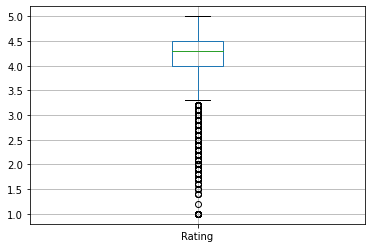

In [20]:
play_store_df.boxplot()

**Step3 : Handling NaN values and imputing them with appropriate value.**

**To know the total NaN values present in play_store dataframe**

In [21]:
play_store_df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**To know distribution of rating across different apps present in Play store dataframe**

Text(0, 0.5, 'Number Of Apps')

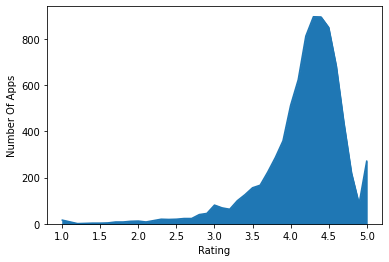

In [22]:
play_store_df.groupby("Rating")['App'].count().plot(kind = "area")
plt.xlabel("Rating")
plt.ylabel("Number Of Apps")

**Since we know from the graph that the data is skewed, it is good to consider the median value for replacing the missing values.Therefore imputing the 1463 NaN values present in Rating column with median value**

In [23]:
#Calculating the median value
play_store_df["Rating"].median()

4.3

In [24]:
#Replacing all the NaN values present in Ratings with the median value(4.3)

play_store_df['Rating'].fillna(play_store_df['Rating'].median(),inplace=True)

In [25]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**To remove NaN values from 'Translated_Review' column of User_Review df**

In [26]:
user_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [27]:
user_df = user_df[~user_df['Translated_Review'].isna()]

**Step4: Data Manipulation**

**1.Size of the applications present in the datset are in MB and KB. Converting entire size column to MB and removing the suffix. For the ease of data processing, changing the data type to float**

In [28]:
#To remove M and K from size column and convert it to float
play_store_df.replace({'Size': '[M]'},'',regex=True,inplace=True)

play_store_df['Size']= play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str( x) else x)

play_store_df.replace('Varies with device',np.nan,inplace=True)

play_store_df['Size'] = play_store_df['Size'].astype(float) 

**2.Replace the '+' value present in Install column with space and convert it to Float**

In [29]:
#Converting Dtype of Installs to float
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: str(x).replace("+",'') if "+" in str(x) else x)
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: str(x).replace(",",'')if "," in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x : float(x))

**3.Converting Reviews column to float**

In [30]:
# Converting Dtype of Reviews to float
play_store_df["Reviews"] = play_store_df["Reviews"].apply(lambda x : float(x))

**4.Formatting Price column and converting it to Float**

In [31]:
play_store_df['Price']=play_store_df['Price'].apply(lambda x: str(x).replace("$",'')if "$" in str(x) else x)
play_store_df["Price"] = play_store_df["Price"].apply(lambda x : float(x))

**5.Formatting Last Updated column to date value**

In [32]:
# Converting Dtype of Last Updated to DateTime
play_store_df["Last Updated"] = pd.to_datetime(play_store_df["Last Updated"]).dt.date

**Now we are done with data cleansing, let us verify how it looks**

In [33]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     8597 non-null   object 
 12  Android Ver     8667 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


# **5.Exploratory Data Analysis and Visualisation  : This will give insight about various aspects of data in hand and gives actionable information.**

## **1.To know number of apps in each category**

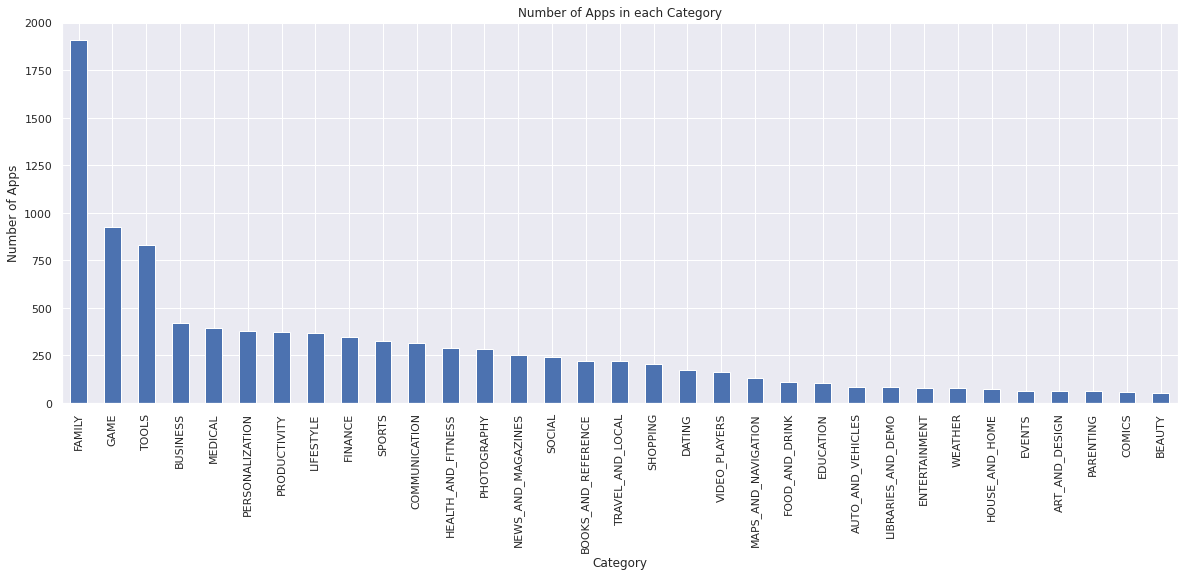

In [76]:
play_store_df.groupby("Category")["App"].count().sort_values(ascending=False).plot(kind = "bar")
sns.set_theme(style="darkgrid")
plt.title('Number of Apps in each Category')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.show()

**Thus from the above results it is clear that Family, Games and Tools category have highest number of apps**

## **2.Number of Installs based on Category**

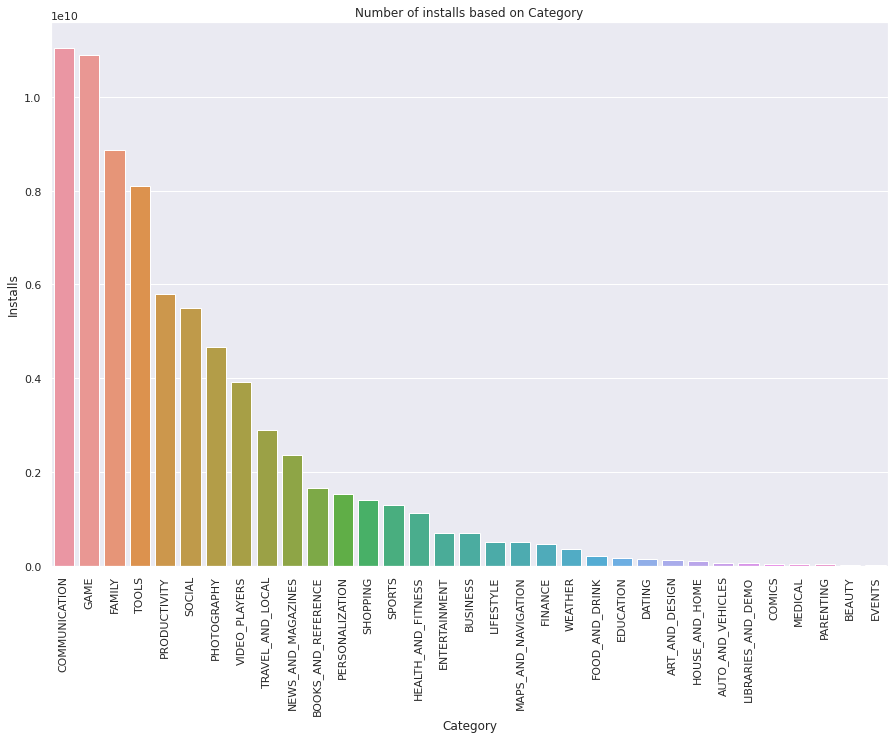

In [35]:
num_of_install = play_store_df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.title('Number of installs based on Category')
plt.xticks(rotation=90)
sns.barplot(x=num_of_install.index, y = num_of_install, data = play_store_df)
plt.show()

**Highest installed category of apps are Communication, Game and Family**

## **3.To know the category wise maximum rating**

In [36]:
play_store_df.groupby(["Category"])["Rating"].max()

Category
ART_AND_DESIGN         5.0
AUTO_AND_VEHICLES      4.9
BEAUTY                 4.9
BOOKS_AND_REFERENCE    5.0
BUSINESS               5.0
COMICS                 5.0
COMMUNICATION          5.0
DATING                 5.0
EDUCATION              4.9
ENTERTAINMENT          4.7
EVENTS                 5.0
FAMILY                 5.0
FINANCE                5.0
FOOD_AND_DRINK         5.0
GAME                   5.0
HEALTH_AND_FITNESS     5.0
HOUSE_AND_HOME         4.8
LIBRARIES_AND_DEMO     5.0
LIFESTYLE              5.0
MAPS_AND_NAVIGATION    4.9
MEDICAL                5.0
NEWS_AND_MAGAZINES     5.0
PARENTING              5.0
PERSONALIZATION        5.0
PHOTOGRAPHY            5.0
PRODUCTIVITY           5.0
SHOPPING               5.0
SOCIAL                 5.0
SPORTS                 5.0
TOOLS                  5.0
TRAVEL_AND_LOCAL       5.0
VIDEO_PLAYERS          4.9
WEATHER                4.8
Name: Rating, dtype: float64

**From above result it is clear that the maximum rating for all the Category is greater than 4.5**

## **4.To know the average rating of each category**

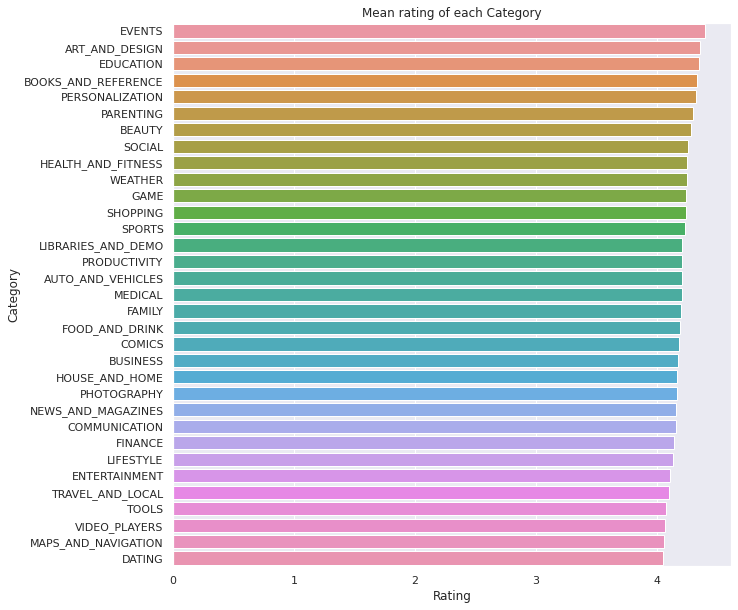

In [37]:
avg_rating = play_store_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Mean rating of each Category')
sns.barplot(x=avg_rating, y=avg_rating.index, data=play_store_df)

plt.show()

**Event has the highest average rating by category,on the other side family, communication and game has a lot of installs causing the low on average rating.**

## **5.To know the number of reviews of each Category**

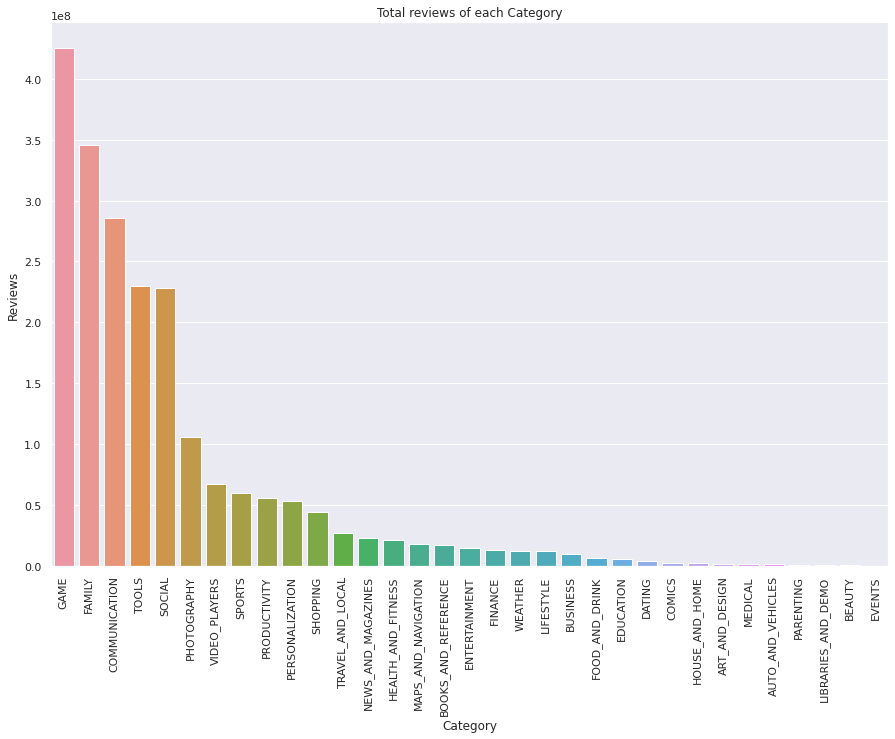

In [38]:
num_of_review = play_store_df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.title('Total reviews of each Category')
plt.xticks(rotation=90)
sns.barplot(x=num_of_review.index, y = num_of_review, data = play_store_df)
plt.show()

**Sometimes Reviews can measure the app popularity. The more reviews, the better. It is noted that Games, Family and Communication category have the highest reviews. An important observation is that Event category has the highest average rating but has reviews almost equal to zero.**

## **6.To know number of Free and Paid apps**

In [39]:
x = play_store_df['Type'].value_counts()
print(x)

Free    8904
Paid     754
Name: Type, dtype: int64


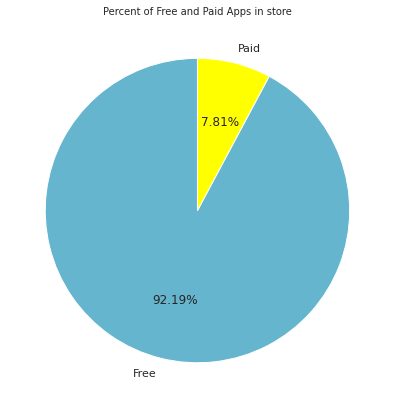

In [40]:
colors = ["c","yellow"]
plt.figure(figsize=(7,7))
explode = [0.2,0]
plt.pie(x,labels=['Free','Paid'], colors=colors,startangle=90,autopct="%.2f%%")
plt.title('Percent of Free and Paid Apps in store',size = 10)
plt.show()

**So from the above pie chart it is clear that the count of Free Apps is much higher than Paid Apps**

## **7.To know distribution of cost across different category**

In [41]:
grp = play_store_df.groupby('Category')
x = grp['Price'].agg(np.sum)

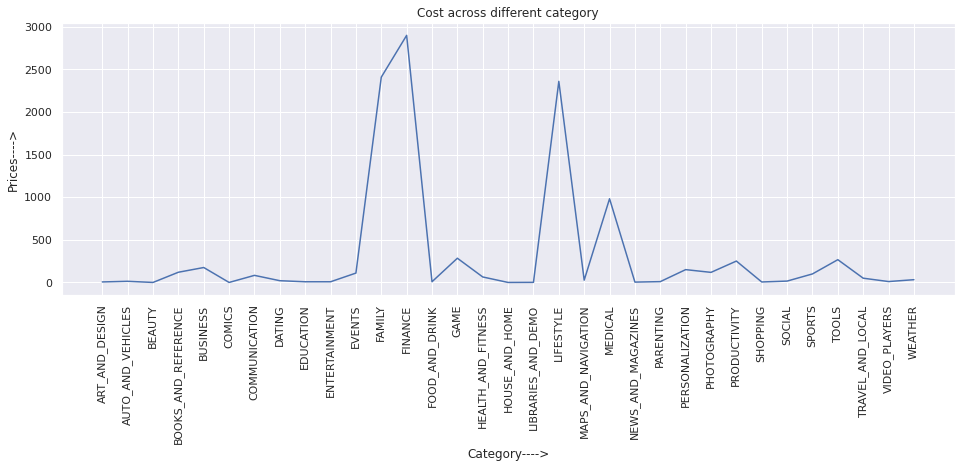

In [42]:
plt.figure(figsize=(16,5))
plt.plot(x,'r', color='b')
plt.xticks(rotation=90)
plt.title('Cost across different category')
plt.xlabel('Category---->')
plt.ylabel('Prices---->')
plt.show()

**Finance, Family and Lifestyle Category have the highest priced apps**

## **8.To know the number of Free and Paid apps installed**

In [43]:
installed_apps = play_store_df.groupby('Type').agg({'Installs':'sum'})
print(installed_apps)

          Installs
Type              
Free  7.522727e+10
Paid  5.736378e+07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


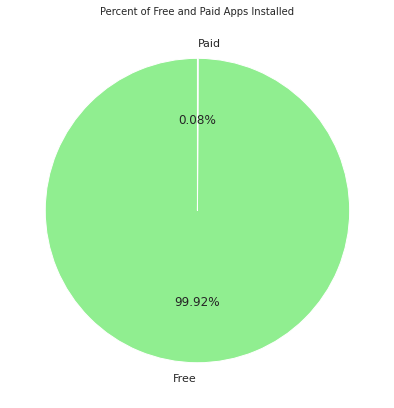

In [44]:
colors = ["lightgreen","b"]
plt.figure(figsize=(7,7))
explode = [0.2,0]
plt.pie(installed_apps,labels=['Free','Paid'], colors=colors,startangle=90,autopct="%.2f%%")
plt.title('Percent of Free and Paid Apps Installed',size = 10)
plt.show()

**From the graph we know that, maximum installs are of Free apps and very low percent of Paid apps have been installed**

## **9.To know the number of free and paid apps category wise**

In [45]:
cat_type = play_store_df.groupby('Category')['Type'].value_counts().unstack()
print(cat_type)

Type                   Free   Paid
Category                          
ART_AND_DESIGN         58.0    3.0
AUTO_AND_VEHICLES      82.0    3.0
BEAUTY                 53.0    NaN
BOOKS_AND_REFERENCE   194.0   28.0
BUSINESS              407.0   12.0
COMICS                 56.0    NaN
COMMUNICATION         289.0   27.0
DATING                165.0    5.0
EDUCATION             100.0    2.0
ENTERTAINMENT          77.0    2.0
EVENTS                 63.0    1.0
FAMILY               1720.0  185.0
FINANCE               328.0   17.0
FOOD_AND_DRINK        110.0    2.0
GAME                  844.0   82.0
HEALTH_AND_FITNESS    272.0   15.0
HOUSE_AND_HOME         73.0    NaN
LIBRARIES_AND_DEMO     83.0    1.0
LIFESTYLE             350.0   19.0
MAPS_AND_NAVIGATION   126.0    5.0
MEDICAL               314.0   82.0
NEWS_AND_MAGAZINES    252.0    2.0
PARENTING              58.0    2.0
PERSONALIZATION       295.0   81.0
PHOTOGRAPHY           262.0   19.0
PRODUCTIVITY          346.0   28.0
SHOPPING            

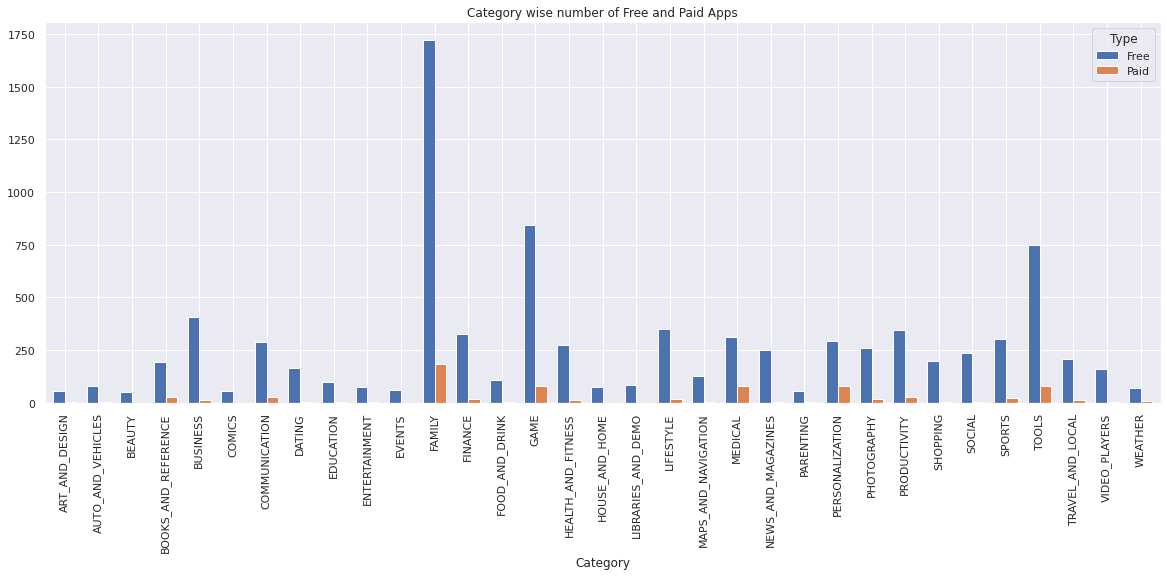

In [46]:
plt.rcParams['figure.figsize'] = (20,7)
cat_type.plot(kind='bar',title='Category wise number of Free and Paid Apps',width=0.7)
plt.show()

**So again, family category has the most free and paid apps followed by Game and Tools.We can see general categories like entertainment, event, education, comic,beauty,libraries & demo,House & Home and many more have apps that are mostly free.**

## **10.To know top 10 highest priced apps**

In [47]:
costly_apps = play_store_df.sort_values(['Price'],ascending=False).head(10).reset_index()
print(costly_apps[['App','Category','Price']])

                                 App   Category   Price
0           I'm Rich - Trump Edition  LIFESTYLE  400.00
1                          I am Rich    FINANCE  399.99
2                         💎 I'm rich  LIFESTYLE  399.99
3  I'm Rich/Eu sou Rico/أنا غني/我很有錢  LIFESTYLE  399.99
4                          I am rich  LIFESTYLE  399.99
5                     I am Rich Plus     FAMILY  399.99
6                 I AM RICH PRO PLUS    FINANCE  399.99
7                  I Am Rich Premium    FINANCE  399.99
8             most expensive app (H)     FAMILY  399.99
9                         I am Rich!    FINANCE  399.99


## **11.To know the highest revenue gernerating Apps**

In [48]:
# Create a new dataframe with only Paid Apps
Paid_Apps = play_store_df[play_store_df['Type']=='Paid']

In [49]:
#Create a new column 'Revenue' which will be product of number of installs and price of app

Paid_Apps['Revenue'] = Paid_Apps['Installs']*Paid_Apps['Price']
Paid_Apps.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.800,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.000,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,100000.0,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,399000.0
478,Truth or Dare Pro,DATING,4.3,0.0,20.000,50.0,Paid,1.49,Teen,Dating,2017-09-01,1,4.0 and up,74.5
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.3,0.0,0.018,100.0,Paid,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0 and up,299.0


In [50]:
#sort the Revenue values in descending to get top 10 earning apps
high_revenue_apps = Paid_Apps.sort_values('Revenue',ascending=False).head(10).reset_index()
print(high_revenue_apps[['App','Category','Installs','Price','Revenue']])

                             App     Category    Installs   Price     Revenue
0                      Minecraft       FAMILY  10000000.0    6.99  69900000.0
1                      I am rich    LIFESTYLE    100000.0  399.99  39999000.0
2              I Am Rich Premium      FINANCE     50000.0  399.99  19999500.0
3                  Hitman Sniper         GAME  10000000.0    0.99   9900000.0
4  Grand Theft Auto: San Andreas         GAME   1000000.0    6.99   6990000.0
5            Facetune - For Free  PHOTOGRAPHY   1000000.0    5.99   5990000.0
6        Sleep as Android Unlock    LIFESTYLE   1000000.0    5.99   5990000.0
7            DraStic DS Emulator         GAME   1000000.0    4.99   4990000.0
8       I'm Rich - Trump Edition    LIFESTYLE     10000.0  400.00   4000000.0
9                     💎 I'm rich    LIFESTYLE     10000.0  399.99   3999900.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


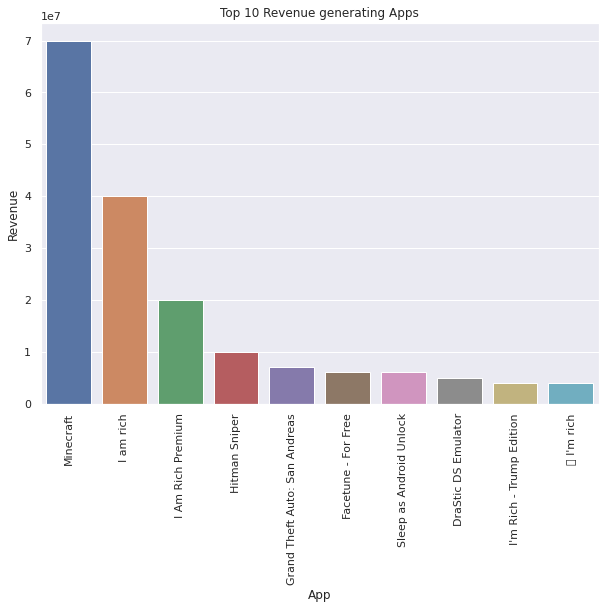

In [51]:
plt.figure(figsize=(10,7))
plt.title('Top 10 Revenue generating Apps')
plt.xticks(rotation=90)
sns.barplot(x=high_revenue_apps.App, y = high_revenue_apps.Revenue, data = high_revenue_apps)
plt.show()

**Revenue generated is the product of number of installs made and price of the app. So from the graph we see that Minecraft has the highest revenue. We have to note that price of Minecraft is just $6.99 but still has emerged as the highest revenue generating app when compared to other costly paid apps. This is because the number of Installs done plays a very vital role in revenue generation. More the installs, more the revenue.**

## **12.To know the distribution of cost of Apps across different Category**

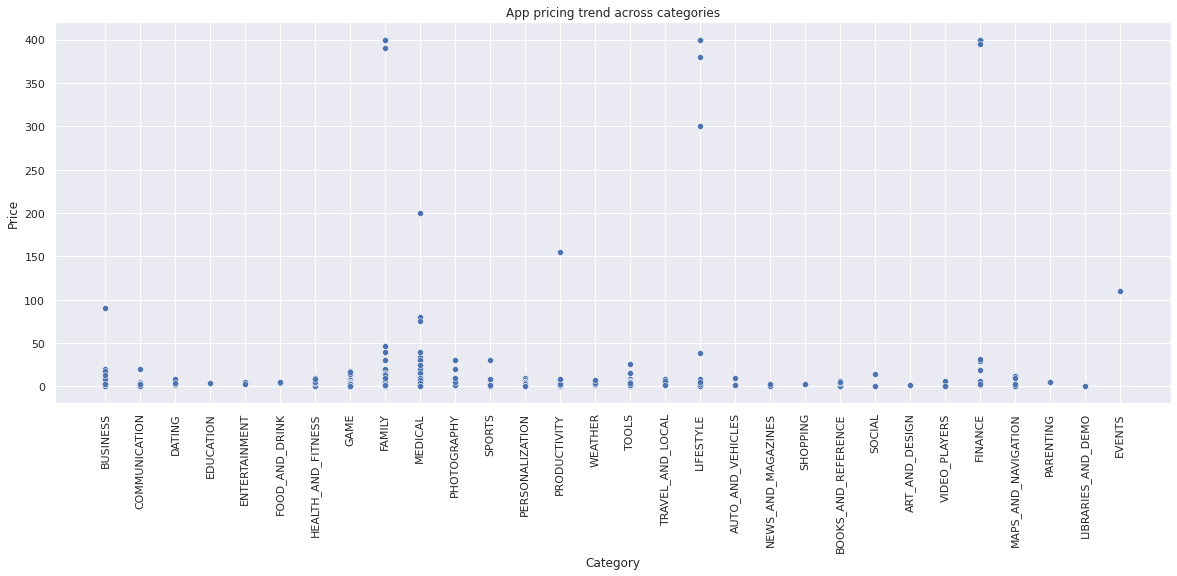

In [52]:
plt.figure(figsize=(20,7))
plt.title('App pricing trend across categories')
plt.xticks(rotation=90)

sns.scatterplot(x='Category', y='Price', data= Paid_Apps)
plt.show()

**From the graph it is clear that almost all the Categories have App price in the range of 1-50. Very few Categories like Family, Lifestyle and Finance have Apps that cost more than $350.**

## **13.To know the distribution of App Size**

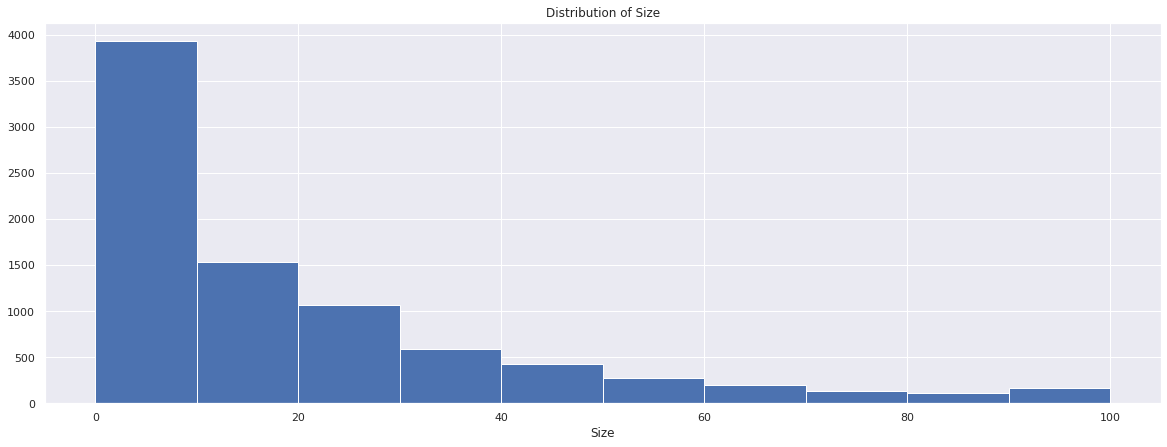

In [53]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(play_store_df['Size']);
plt.show()

**From the hisrtogram it is clear that most of the Apps are in the range of 0 to 10 MB size.** 

## **14.To know the distribution of Size across different Category**

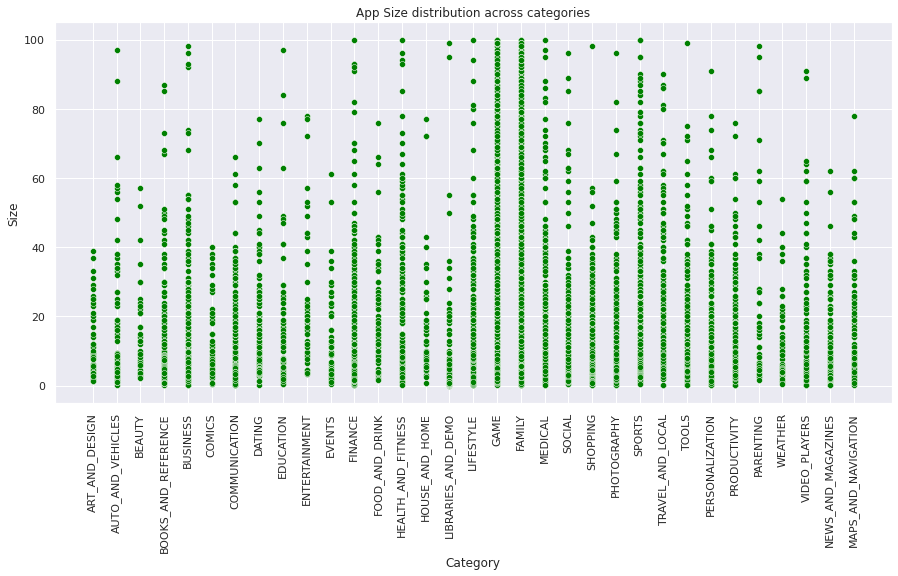

In [54]:
plt.figure(figsize=(15,7))
plt.title('App Size distribution across categories')
plt.xticks(rotation=90)

sns.scatterplot(x='Category', y='Size', data= play_store_df,color='green')
plt.show()

**So from the graph we see that Categories like Game, Family and Sports have Apps ranging in all the Sizes. For others, the App Size is scattered and mostly concentrated over 0-40MB Size range.**

## **15.To know the impact of Size on Installs**

In [55]:
#Segregating the apps based on the size into light, medium and bulky category

light_apps = play_store_df[play_store_df['Size'] <= 10]

medium_apps = play_store_df[(play_store_df['Size'] > 10) & (play_store_df['Size'] <= 50)]

bulky_apps = play_store_df[play_store_df['Size'] > 50]


In [56]:
light_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.7,5000.0,Free,0.0,Everyone,Art & Design,2018-06-06,NaN,4.2 and up


In [57]:
medium_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up


In [58]:
bulky_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1598.0,56.0,1000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-26,11,4.1 and up
51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,284.0,57.0,100000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-26,3,4.1 and up
57,Extreme Rally Championship,AUTO_AND_VEHICLES,4.2,129.0,54.0,100000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-26,3,4.1 and up
103,Beauty Selfie Camera,BEAUTY,4.2,2225.0,52.0,500000.0,Free,0.0,Everyone,Beauty,2018-02-28,1.6,4.1 and up
122,"Sephora: Skin Care, Beauty Makeup & Fragrance ...",BEAUTY,4.5,26834.0,57.0,1000000.0,Free,0.0,Everyone,Beauty,2018-07-24,18.5,5.0 and up


In [59]:
#Calculating the total Installs of light, medium and bulky apps

total_light_app_installs = light_apps['Installs'].sum()

total_medium_app_installs = medium_apps['Installs'].sum()

total_bulky_app_installs = bulky_apps['Installs'].sum()


print(f'Total number of Light Apps Installed: {total_light_app_installs}')
print(f'Total number of Medium Apps Installed: {total_medium_app_installs}')
print(f'Total number of Bulky Apps Installed: {total_bulky_app_installs}')

Total number of Light Apps Installed: 4391793715.0
Total number of Medium Apps Installed: 15647960956.0
Total number of Bulky Apps Installed: 11394501733.0


In [60]:
# Creating a Dataframe of number of installs based on size

install_list = [['Light Apps','Less than 10MB',total_light_app_installs],['Medium Apps','10 to 50MB',total_medium_app_installs],['Bulky Apps','Greater than 50MB',total_bulky_app_installs]]

install_df = pd.DataFrame(install_list,columns=['App_Category','Size Range','Total_Installs'])

install_df.head()

,App_Category,Size Range,Total_Installs
0,Light Apps,Less than 10MB,4.391794e+09
1,Medium Apps,10 to 50MB,1.564796e+10
2,Bulky Apps,Greater than 50MB,1.139450e+10


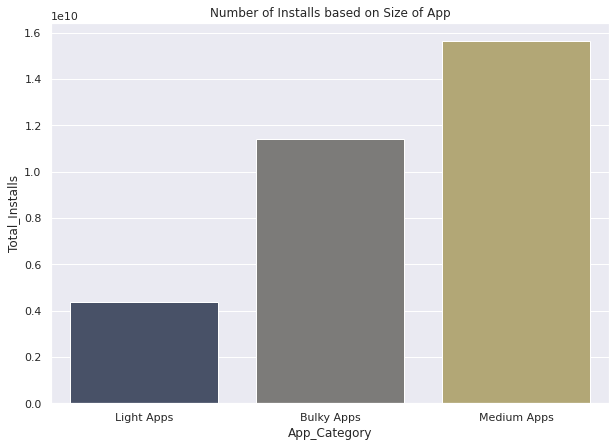

In [61]:
plt.figure(figsize=(10,7))
plt.title('Number of Installs based on Size of App')

sns.barplot(x=install_df.App_Category, y = install_df.Total_Installs, data = install_df,palette ='cividis',order = ["Light Apps", "Bulky Apps", "Medium Apps"])

plt.show()

**From the graph it is clear that users mostly install Medium Sized Apps that lie in the range of 10 - 50 MB.**

## **16.To know the Apps available for different Age group**

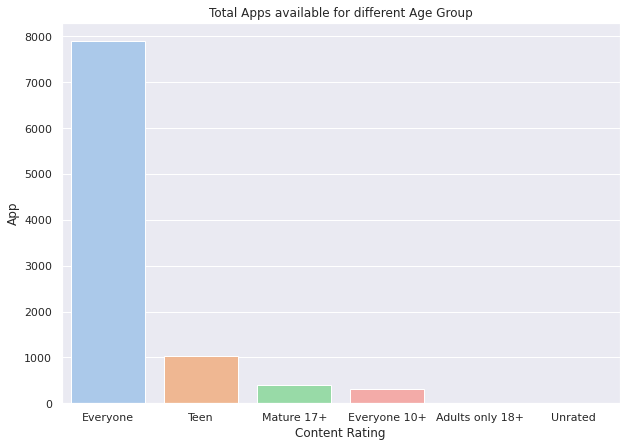

In [75]:
num_of_apps = play_store_df.groupby('Content Rating')['App'].count().sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.title('Total Apps available for different Age Group')
sns.barplot(x=num_of_apps.index, y = num_of_apps, data = play_store_df,palette='pastel')
plt.show()

**From the above graph we can conclude that maximum number of Apps are availble for Everyone.**

## **17.To know the percentage of Review Sentiment**

In [63]:
#Merge the play_store data and user reviews data on App. 
#This helps in mapping the reviews and other details with the app sepcific data present in play_store df.

merged_df = play_store_df.merge(user_df,on='App')
merged_df.shape

(35929, 17)

In [64]:
# This merged_df has 4 new columns at the end 
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,It's...a coloring book ap. And I like adult co...,Positive,2.166667e-01,0.573810
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,wanted access pictures. I denied let app. Don'...,Neutral,0.000000e+00,0.000000
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,Way many ads... im paying 8$USD pictures color...,Positive,3.000000e-01,0.600000
3,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,"good bad color outside lines. like real, tradi...",Positive,2.780000e-17,0.579167
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,I really enjoying application. My complaint sm...,Negative,-3.472222e-02,0.581944


In [65]:
sentiment_count = merged_df['Sentiment'].value_counts()
print(sentiment_count)

Positive    23073
Negative     8005
Neutral      4851
Name: Sentiment, dtype: int64


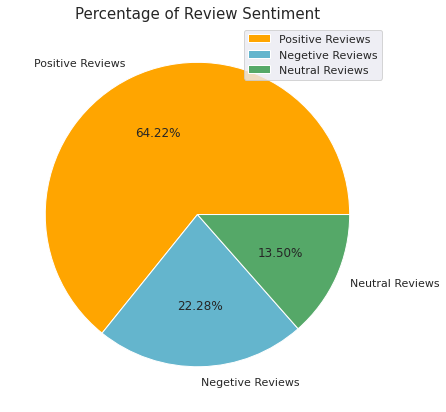

In [66]:
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
colors = ['orange','c','g']
plt.figure(figsize=(7,7))
explode = [0,0.3,0.03]
plt.pie(sentiment_count,labels=labels, colors=colors,autopct="%.2f%%")
plt.title('Percentage of Review Sentiment',size = 15)
plt.legend()
plt.show()

**Review Sentiment depicts the attitude of users towards the application that is whether it is positive, negative or neutral. From the Pie chart, we get to know that most of the reviews are positive.**

## **18.To know the Distribution of Subjectivity**

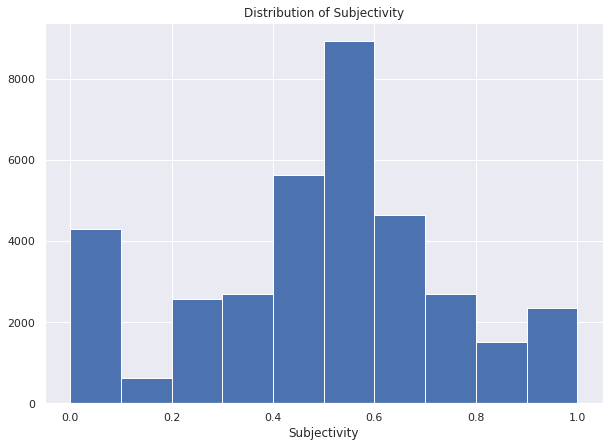

In [67]:
plt.figure(figsize=(10,7))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

**From the histogram, we can see that most of the value for Sentiment_Subjectivity lie in between 0.4 to 0.7. From this we can comprehend that users often give subjective reviews that is based on their experience.**

## **19.To know Installs based on Last Updated**

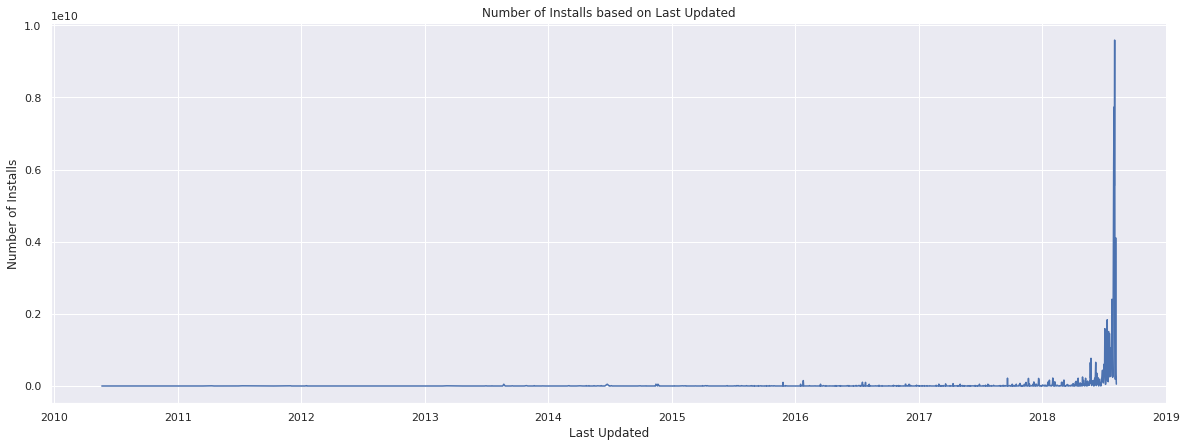

In [74]:
play_store_df.groupby('Last Updated')['Installs'].sum().plot()
plt.title('Number of Installs based on Last Updated')
plt.xlabel('Last Updated')
plt.ylabel('Number of Installs')
plt.show()

**It is seen from the graph that most of installs are of the latest version of app.**

# **6.Observations drawn from above Analysis :**
Exploratory Data Analysis and Visualization is very helpful in gathering insights about data in hand specially when we have no clue about what information lies within our dataset. 
This analysis has resulted in better understanding of App popularity,rating,performance and many more aspects such as,

*  Family, Games and Tools category have highest number of apps but as per the market trend and customer requirements, highest installed category of apps are from Communication, Game and Family

*   The average rating of applications is 4.3 and Event has the highest average rating by category. On the other side, Family, Communication and Game has a lot of installs causing the low on average rating.

*   Reviews can  be used as one of the tool to measure the app popularity. The more reviews, the better. It is noted that Games, Family and Communication category have the highest reviews. An important observation is that Event category has the highest average rating but has reviews almost equal to zero.

*   The number of Free Apps in the market in much higher than the Paid Apps. The number of Free Apps installed surpasses the percentage of Paid Apps installed. Thus it can be observed that customer's perfer Free Apps more.

*   Finance, Family and Lifestyle Category have the highest priced apps.Family category has the most number of free and paid apps followed by Game and Tools.We can see some general categories like entertainment, event, education, comic,beauty,libraries & demo,House & Home and many more have apps that are mostly free.

*   Almost all the Categories have App price in the range of 1-50. Very few Categories like Family, Lifestyle and Finance have Apps that cost more than $350.

*   Most of the Apps are in the range of 0 to 10 MB size.Categories like Game, Family and Sports have Apps ranging in all the Sizes. For others, the App Size is scattered and mostly concentrated over 0-40MB Size range.

*   App size is also an important consideration while installing the app and hence  users mostly install Medium Sized Apps that lie in the range of 10 - 50 MB.

*   Maximum number of Apps are availble for Everyone to use.

*   Review Sentiment gives an idea about how the user has liked the application that is whether it is positive, negative or neutral. From the analysis, we get to know that most of the reviews are positive.

*   Most of the value for Sentiment_Subjectivity lie in between 0.4 to 0.7. From this we can comprehend that users often give subjective reviews that is based on their experience.













# **7.Conclusion:**
The above obseravtions mentioned will help the developer to focus on the areas that require improvement. The dataset also contains alot of aspects to better understand customer demands and thus aid developers to work on the areas that can lead to the product popularity and yeild good revenue.